# Taller 2: Linear Regression

MINE-4101: Applied Data Science  
Univerisdad de los Andes  

**Business context:** El Banco Mundial es una entidad internacional enfocada en proporcionar asistencia financiera y técnica a naciones en desarrollo. Esta ayuda se canaliza a través de créditos destinados a diversos proyectos que abarcan desde infraestructura hasta reformas institucionales, con el objetivo de elevar el bienestar económico y social de las comunidades beneficiadas. Una estrategia de préstamo bien informada y alineada con las circunstancias particulares de cada país no solo aumenta las probabilidades de reembolso total, sino que garantiza una utilización eficaz de los fondos en atender las necesidades genuinas del territorio.

Históricamente, el Producto Interno Bruto (PIB) ha servido como un indicador crucial para valorar la solvencia de un país. A pesar de contar con informes anuales del PIB, la correlación entre este y otros indicadores como la tasa de empleo, el acceso a internet y la expectativa de vida, aún no está completamente entendida.

En su papel de consultor científico de datos del Banco Mundial, se le ha asignado la tarea de conducir análisis que ayuden a esclarecer esta cuestión. Para este propósito, se le ha suministrado un conjunto de datos compilado por la organización Gapminder, que ha integrado indicadores por país de diversas fuentes para un periodo determinado.

A continuación se presentan los recursos proporcionados:

[Dataset](https://drive.google.com/file/d/1zsFX4PUehK_rmLtP-1hqPnSo86VMHDAm/view)

[Diccionario de datos](https://drive.google.com/file/d/12kCZLW8i9a4YzNNdCTAU5SSjIEIyTMWs/view)


Se espera que, mediante la aplicación de modelos de regresión lineal y técnicas de preparación y exploración de datos, pueda discernir y comprender las posibles correlaciones entre el PIB de un país y otros indicadores disponibles.

# Librerias

In [1]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

import statsmodels.api as sm

# Diccionario

| Variable | Descripción en Español |
|---|---|
| country | Identificador Único |
| incomeperperson | Producto Interno Bruto per cápita 2010 en dólares estadounidenses constantes del año 2000. Se ha tenido en cuenta la inflación pero no las diferencias en el coste de vida entre países. |
| alcconsumption | Consumo de alcohol por adulto (edad 15+) en 2008, litros. Consumo medio de alcohol registrado y estimado, por adulto (15+) per cápita en litros de alcohol puro. |
| armedforcesrate | Personal de las fuerzas armadas (% del total de la fuerza laboral) |
| breastcancerper100TH | Nuevos casos de cáncer de mama en 2002 por cada 100,000 mujeres. Número de nuevos casos de cáncer de mama en 100,000 residentes femeninas durante un año determinado. |
| co2emissions | Emisiones acumuladas de CO2 en 2006 (toneladas métricas). Cantidad total de emisiones de CO2 en toneladas métricas desde 1751. |
| femaleemployrate | Empleadas mujeres en 2007, edad 15+ (% de la población). Porcentaje de la población femenina, edad superior a 15, que ha estado empleada durante el año dado. |
| HIVrate | Prevalencia estimada de VIH en 2009 % - (Edades 15-49). Número estimado de personas que viven con VIH por 100 población del grupo de edad 15-49. |
| Internetuserate | Usuarios de Internet en 2010 (por 100 personas). Los usuarios de Internet son personas con acceso a la red mundial. |
| lifeexpectancy | Expectativa de vida en 2011 al nacer (años). Número promedio de años que viviría un niño recién nacido si los patrones de mortalidad actuales permanecieran iguales. |
| oilperperson | Consumo de petróleo per cápita en 2010 (toneladas por año y persona). |
| polityscore | Puntuación de democracia en 2009 (Polity). Puntuación de polity general del conjunto de datos Polity IV, calculada restando una puntuación de autocracia de una puntuación de democracia. El indicador resumen de la naturaleza democrática y libre de un país. -10 es el valor más bajo, 10 el más alto. |
| relectricperperson | Consumo de electricidad residencial en 2008, por persona (kWh). Cantidad de consumo de electricidad residencial por persona durante el año dado, contado en kilovatios-hora (kWh). |
| suicideper100TH | Suicidio, ajustado por edad, por 100,000. Mortalidad debido a lesiones autoinfligidas, por 100,000 población estándar, ajustada por edad. |
| employrate | Empleados totales en 2007, edad 15+ (% de la población). Porcentaje de la población total, edad superior a 15, que ha estado empleada durante el año dado. |
| urbanrate | Población urbana (% del total). La población urbana se refiere a las personas que viven en áreas urbanas según lo definido por las oficinas nacionales de estadística (calculado utilizando estimaciones de población del Banco Mundial y proporciones urbanas de las Perspectivas de Urbanización Mundial de las Naciones Unidas). |

# 1. Carga de datos

In [2]:
gapminder = pd.read_csv("gapminder_final.csv")

In [3]:
# Observar los datos
gapminder.head()

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate
0,Ireland,27595.091350,14.92,0.450024,74.9,1.633779e+09,51.000000,0.2,69.770394,80.557,1.700262,10.0,2051.802338,10.365070,59.900002,61.34
1,Albania,1914.996551,7.29,1.024736,57.4,2.237473e+08,42.099998,NaN,44.989947,76.918,NaN,9.0,636.341383,7.699330,51.400002,46.72
2,Central African Rep.,239.518749,3.17,0.148659,16.5,8.338000e+06,62.900002,4.7,2.300027,48.398,NaN,-1.0,NaN,13.548420,71.300003,38.58
3,Barbados,9243.587053,6.42,0.663956,62.5,3.616067e+07,60.299999,1.4,70.028599,76.835,NaN,NaN,NaN,3.108603,66.900002,39.84
4,Italy,18982.269290,9.72,1.729346,74.4,1.900045e+10,35.799999,0.3,53.740217,81.855,1.207250,10.0,1176.385457,4.930045,46.400002,68.08


Además de los datos iniciales se consideró importante incluir información adicional sobre los paises que puede llegar a ser de gran utilidad para el análisis. Particularmente se exploró el dataset Countries of the World, el cual contiene información sobre los paises del mundo, su ubicación, población, área, densidad poblacional, entre otros. Este dataset se encuentra disponible en el siguiente [link](https://www.kaggle.com/fernandol/countries-of-the-world).

In [4]:
# Lectura del nuevo dataset. Todas las columnas son numéricas excepto Country y Region
countries = pd.read_csv("countries of the world.csv", decimal=",")

In [5]:
# Observar los datos
countries.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


# 2. Entendimiento y Preparación

## 2.1 Unión de datasets

Como se mencionó anteriormente, se consideró importante incluir información adicional sobre los paises que puede llegar a ser de gran utilidad para el análisis. Realizar esta unión no es un proceso trivial, pues los datasets no tienen nombres de paises estandarizados. Por ejemplo, en el dataset de Gapminder se encuentra el país "Congo, Dem. Rep.", mientras que en el dataset de Countries of the World se encuentra "Congo, Democratic Republic of the". Por lo tanto es necesario realizar un proceso de estandarización que nos permita unir los datasets de manera correcta.

In [6]:
# Lower case para los nombres de las columnas
gapminder.columns = gapminder.columns.str.lower()
countries.columns = countries.columns.str.lower()

# Lower case y strip para los nombres de los países. Cambio rep por republic y quito comas
gapminder.country = gapminder.country.str.lower().str.strip()
countries.country = countries.country.str.lower().str.strip()


# Observemos las columnas de ambos datasets
print("Columnas de gapminder: ", gapminder.columns)
print("Columnas de countries: ", countries.columns)

Columnas de gapminder:  Index(['country', 'incomeperperson', 'alcconsumption', 'armedforcesrate',
       'breastcancerper100th', 'co2emissions', 'femaleemployrate', 'hivrate',
       'internetuserate', 'lifeexpectancy', 'oilperperson', 'polityscore',
       'relectricperperson', 'suicideper100th', 'employrate', 'urbanrate'],
      dtype='object')
Columnas de countries:  Index(['country', 'region', 'population', 'area (sq. mi.)',
       'pop. density (per sq. mi.)', 'coastline (coast/area ratio)',
       'net migration', 'infant mortality (per 1000 births)',
       'gdp ($ per capita)', 'literacy (%)', 'phones (per 1000)', 'arable (%)',
       'crops (%)', 'other (%)', 'climate', 'birthrate', 'deathrate',
       'agriculture', 'industry', 'service'],
      dtype='object')


Datos los dos datasets podemos hacer un join entre ellos por país con el objetivo de consolidar un dataset principal que contenga toda la información. Este join se hará como es natural, por nombre del país.

In [7]:
# Combinar los dos datasets
merged_data = pd.merge(gapminder, countries, left_on='country', right_on='country', how='inner')

In [8]:
# Observar los datos
merged_data.head()

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,...,phones (per 1000),arable (%),crops (%),other (%),climate,birthrate,deathrate,agriculture,industry,service
0,ireland,27595.091350,14.92,0.450024,74.9,1.633779e+09,51.000000,0.2,69.770394,80.557,...,500.5,15.20,0.03,84.77,3.0,14.45,7.82,0.050,0.460,0.490
1,ireland,27595.091350,14.92,0.450024,74.9,1.633779e+09,51.000000,0.2,69.770394,80.557,...,500.5,15.20,0.03,84.77,3.0,14.45,7.82,0.050,0.460,0.490
2,albania,1914.996551,7.29,1.024736,57.4,2.237473e+08,42.099998,NaN,44.989947,76.918,...,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
3,central african rep.,239.518749,3.17,0.148659,16.5,8.338000e+06,62.900002,4.7,2.300027,48.398,...,2.3,3.10,0.14,96.76,2.0,33.91,18.65,0.550,0.200,0.250
4,barbados,9243.587053,6.42,0.663956,62.5,3.616067e+07,60.299999,1.4,70.028599,76.835,...,481.9,37.21,2.33,60.46,2.0,12.71,8.67,0.060,0.160,0.780


In [9]:
# Que paises de gapminder no estan en countries?
gapminder[~gapminder.country.isin(countries.country)]["country"]

18             macedonia, fyr
23                korea, rep.
41                     gambia
46                yemen, rep.
74             macedonia, fyr
78            slovak republic
79                    bahamas
106               congo, rep.
113            dominican rep.
126       trinidad and tobago
134                   myanmar
135    bosnia and herzegovina
157                czech rep.
164               timor-leste
Name: country, dtype: object

In [10]:
countries_to_filter = ["macedonia", "korea", "gambia", "slovak", "bahamas", "dominican", "trinidad", "myanmar", "bosnia", "czech", "timor", "congo"]

# Nombres de los paises que contienen los nombres de los paises a filtrar
filtered_countries = countries[countries.country.str.contains("|".join(countries_to_filter))]["country"].values

print(filtered_countries)

['bahamas, the' 'bosnia & herzegovina' 'congo, dem. rep.'
 'congo, repub. of the' 'czech republic' 'dominican republic' 'east timor'
 'gambia, the' 'korea, north' 'korea, south' 'macedonia' 'slovakia'
 'trinidad & tobago']


In [11]:
# En gapminder cambio
# macedonia, fyr por macedonia
# korea, rep. por south korea
# yemen, rep. por yemen
# slovak republic por slovakia
# congo, rep. por democratic republic of the congo
# dominican rep. por dominican republic
# czech rep. por czech republic
# timor-leste por east timor
gapminder.country = gapminder.country.str.replace("macedonia, fyr", "macedonia", regex=True)
gapminder.country = gapminder.country.str.replace("korea, rep.", "south korea", regex=True)
gapminder.country = gapminder.country.str.replace("yemen, rep.", "yemen", regex=True)
gapminder.country = gapminder.country.str.replace("slovak republic", "slovakia", regex=True)
gapminder.country = gapminder.country.str.replace("congo, rep.", "republic of the congo", regex=True)
gapminder.country = gapminder.country.str.replace("congo, dem. rep.", "democratic republic of the congo", regex=True)
gapminder.country = gapminder.country.str.replace("dominican rep.", "dominican republic", regex=True)
gapminder.country = gapminder.country.str.replace("czech rep.", "czech republic", regex=True)
gapminder.country = gapminder.country.str.replace("timor-leste", "east timor", regex=True)

# En contries cambio
# bahamas, the por bahamas
# bosnia & herzegovina por bosnia and herzegovina
# congo, dem. rep. por democratic republic of the congo
# gambia, the por gambia
# korea, south por south korea
# trinidad & tobago por trinidad and tobago
countries.country = countries.country.str.replace("bahamas, the", "bahamas", regex=True)
countries.country = countries.country.str.replace("bosnia & herzegovina", "bosnia and herzegovina", regex=True)
countries.country = countries.country.str.replace("congo, repub. of the", "republic of the congo", regex=True)
countries.country = countries.country.str.replace("congo, dem. rep.", "democratic republic of the congo", regex=True)
countries.country = countries.country.str.replace("gambia, the", "gambia", regex=True)
countries.country = countries.country.str.replace("gambia, the", "gambia", regex=True)
countries.country = countries.country.str.replace("korea, south", "south korea", regex=True)
countries.country = countries.country.str.replace("trinidad & tobago", "trinidad and tobago", regex=True)
countries.country = countries.country.str.replace("burma", "myanmar", regex=True) # Burma cambió su nombre a Myanmar en 1989

In [12]:
# Combinar los dos datasets nuevamente
merged_data = pd.merge(gapminder, countries, left_on='country', right_on='country', how='inner')

# Que paises de gapminder no estan en countries?
gapminder[~gapminder.country.isin(countries.country)]["country"]

# Si hay alguna fila repetida. Eliminarla.
merged_data = merged_data.drop_duplicates()

# La columna denominada "gdp ($ per capita)" en particular se refiere a los mismo que nuestra variable objetivo pero con valores de 2007. Entonces eliminarla es la mejor opción pues no aporta información.
merged_data = merged_data.drop(columns=["gdp ($ per capita)"])

Logramos conservar todos los paises de nuestro dataset original (gapminder) y además logramos incluir información adicional (19 columnas) que puede llegar a ser de gran utilidad para el análisis.

## 2.2 Entendimiento del conjunto de datos unificado

### Dimensiones del Dataset

In [13]:
# Observamos la forma de los datso
print("Forma de nusetro dataset: ", merged_data.shape)

Forma de nusetro dataset:  (166, 34)


### Tipos de Datos

In [14]:
# Observemos las columnas de nuestro dataset y sus tipos de datos
print("Columnas y tipos de datos de nuestro dataset: ", merged_data.dtypes)

Columnas y tipos de datos de nuestro dataset:  country                                object
incomeperperson                       float64
alcconsumption                        float64
armedforcesrate                       float64
breastcancerper100th                  float64
co2emissions                          float64
femaleemployrate                      float64
hivrate                               float64
internetuserate                       float64
lifeexpectancy                        float64
oilperperson                          float64
polityscore                           float64
relectricperperson                    float64
suicideper100th                       float64
employrate                            float64
urbanrate                             float64
region                                 object
population                              int64
area (sq. mi.)                          int64
pop. density (per sq. mi.)            float64
coastline (coast/area ratio)     

### Análisis de las variables

#### Estadisticas descriptivas

In [15]:
descriptive_stats = merged_data.describe(include='all')
print(descriptive_stats)

        country  incomeperperson  alcconsumption  armedforcesrate  \
count       166       163.000000      166.000000       162.000000   
unique      166              NaN             NaN              NaN   
top     ireland              NaN             NaN              NaN   
freq          1              NaN             NaN              NaN   
mean        NaN      7202.019107        6.663795         1.359531   
std         NaN     10469.295971        5.026471         1.516373   
min         NaN       103.775857        0.030000         0.000000   
25%         NaN       602.502870        2.445000         0.476071   
50%         NaN      2344.896916        5.920000         0.917066   
75%         NaN      8550.031767        9.742500         1.572321   
max         NaN     52301.587180       23.010000         9.820127   

        breastcancerper100th  co2emissions  femaleemployrate     hivrate  \
count             165.000000  1.640000e+02        165.000000  144.000000   
unique             

#### Valores nulos

In [16]:
null_values = merged_data.isnull().sum()
print(null_values)

country                                 0
incomeperperson                         3
alcconsumption                          0
armedforcesrate                         4
breastcancerper100th                    1
co2emissions                            2
femaleemployrate                        1
hivrate                                22
internetuserate                         3
lifeexpectancy                          0
oilperperson                          105
polityscore                            10
relectricperperson                     36
suicideper100th                         0
employrate                              1
urbanrate                               0
region                                  0
population                              0
area (sq. mi.)                          0
pop. density (per sq. mi.)              0
coastline (coast/area ratio)            0
net migration                           0
infant mortality (per 1000 births)      0
literacy (%)                      

#### Distribución de los Datos

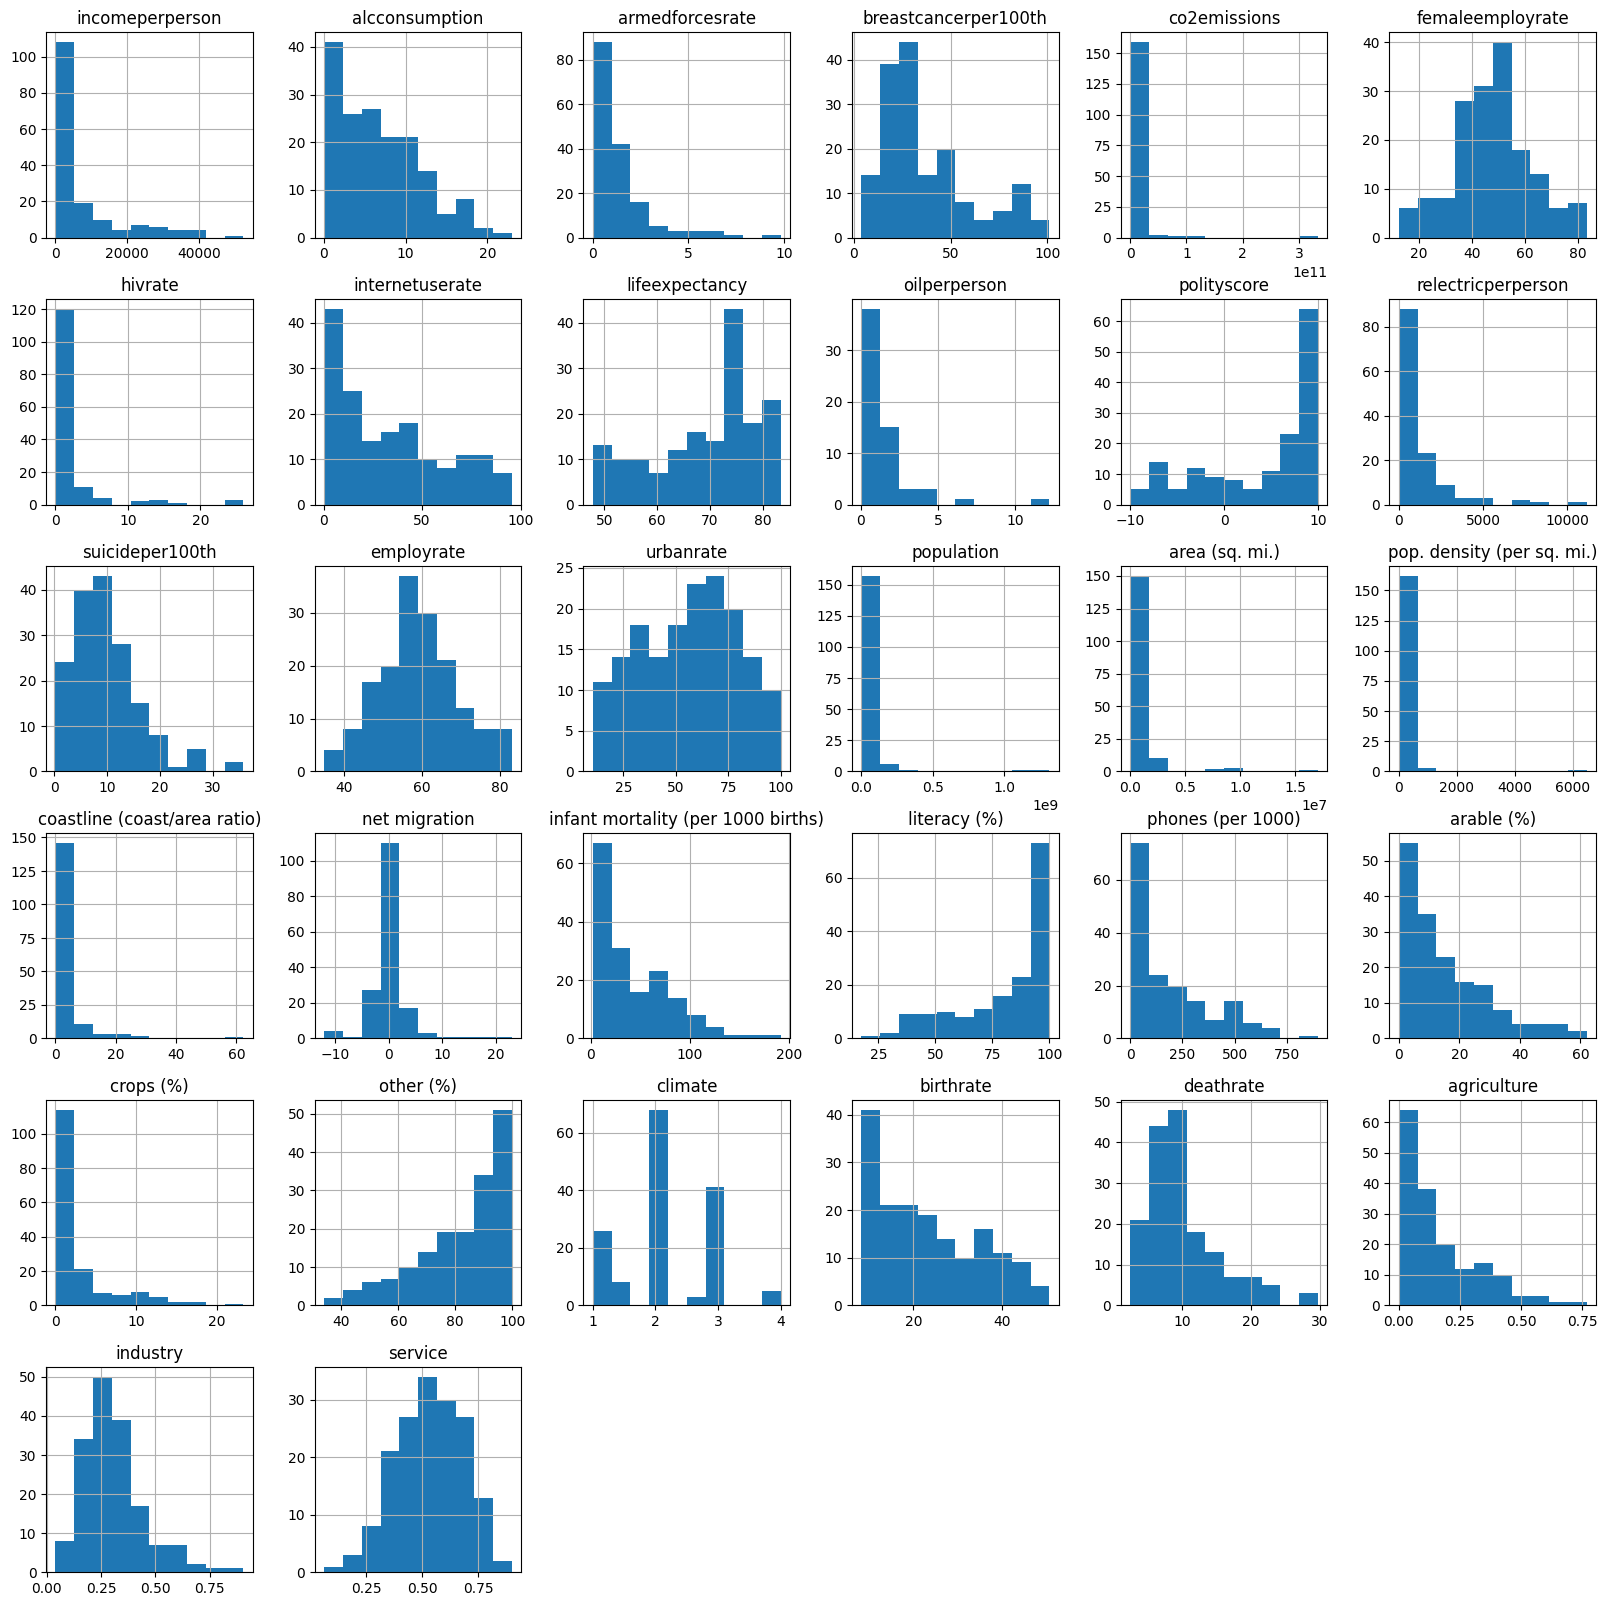

In [17]:
# Histogramas para las columnas numéricas
merged_data.hist(figsize=(20, 20))
plt.show()

#### Boxplots

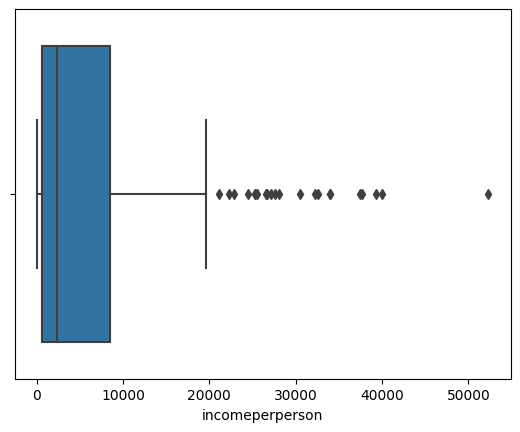

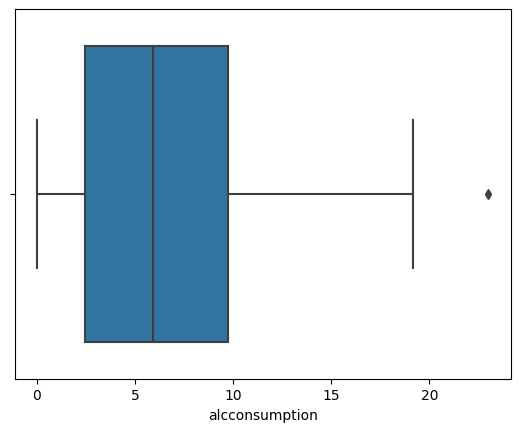

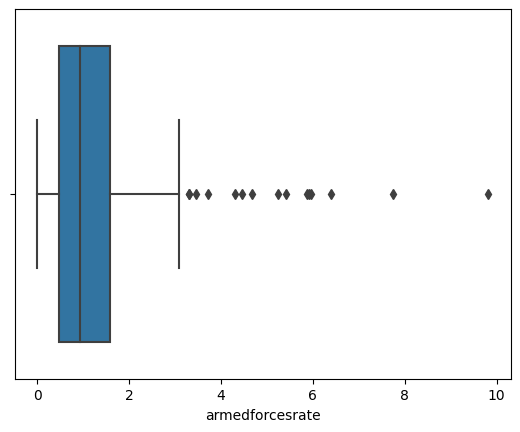

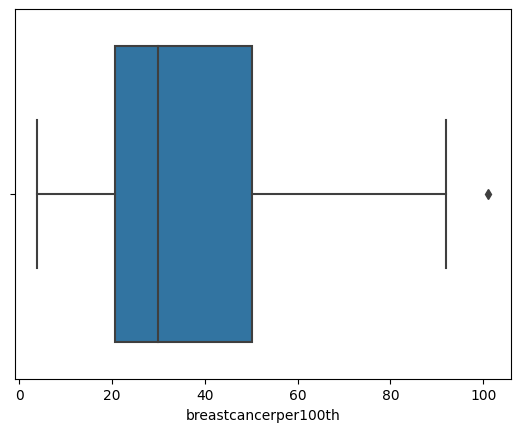

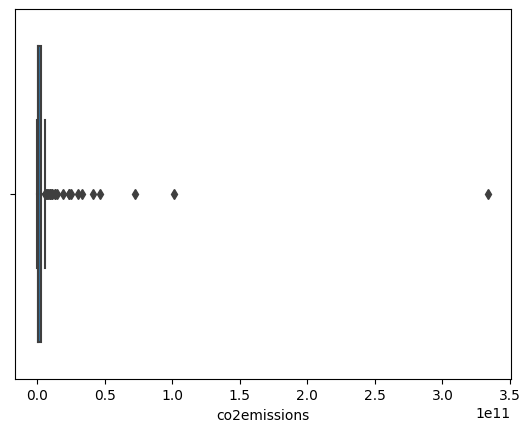

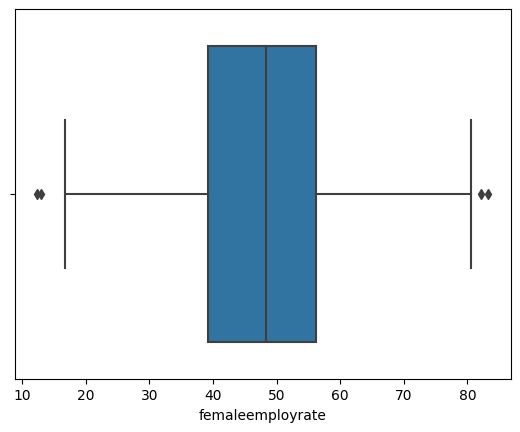

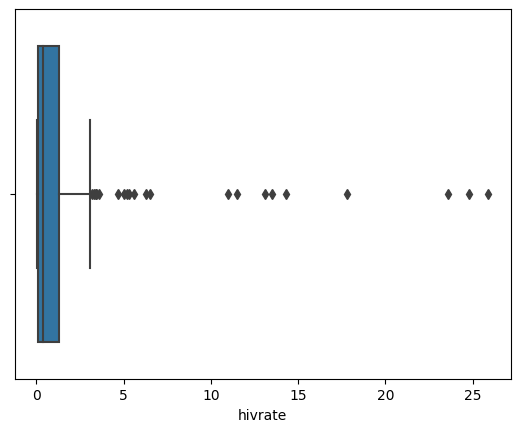

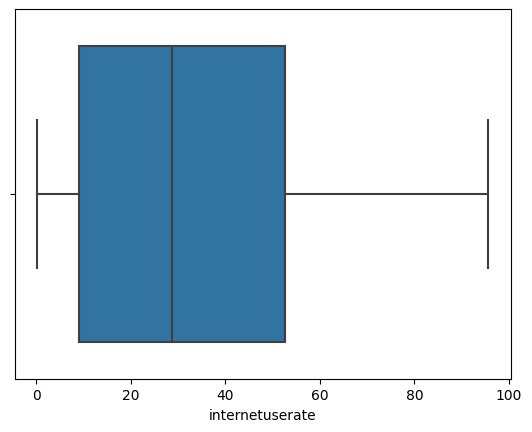

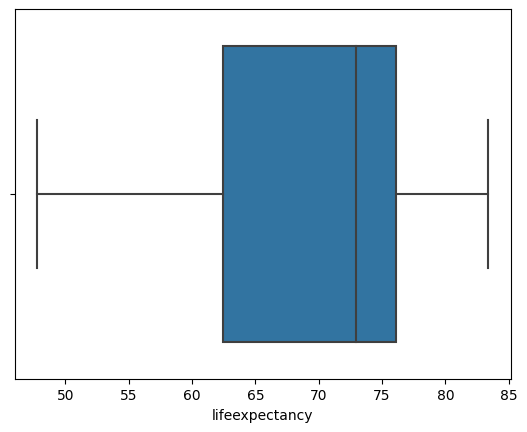

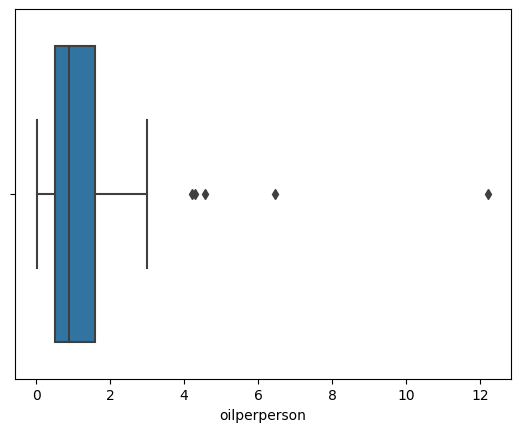

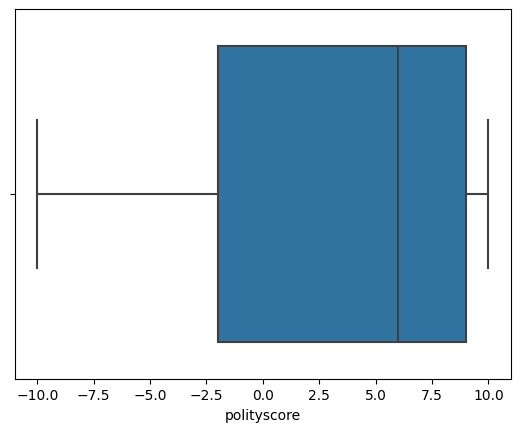

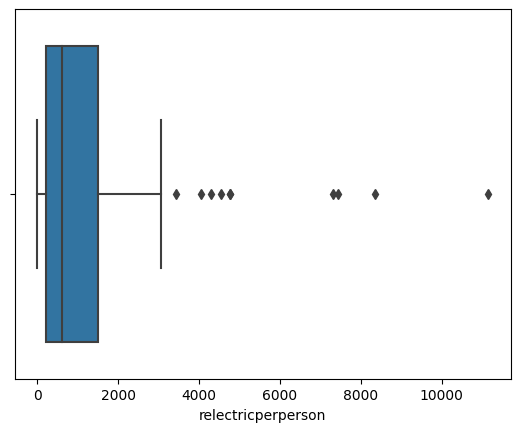

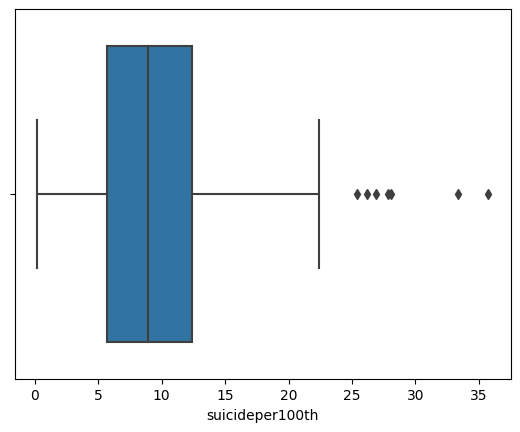

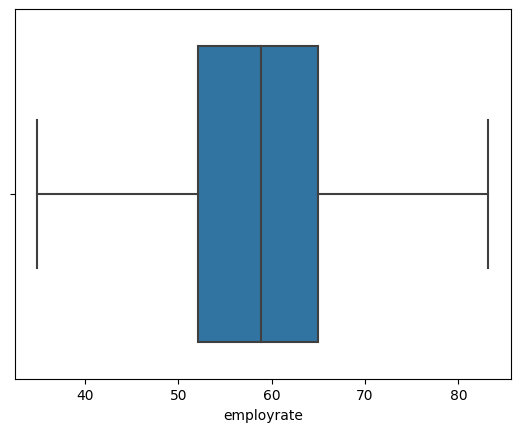

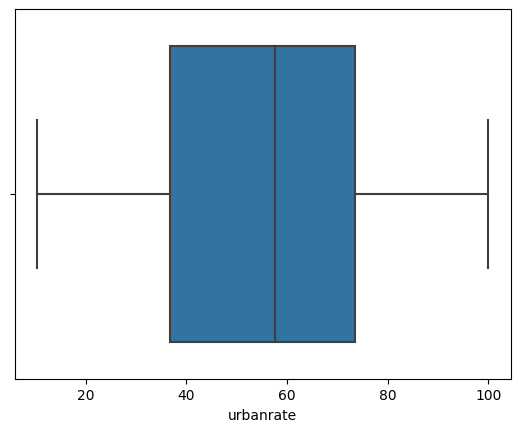

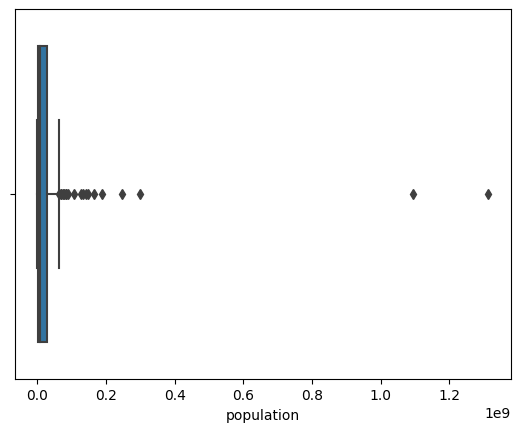

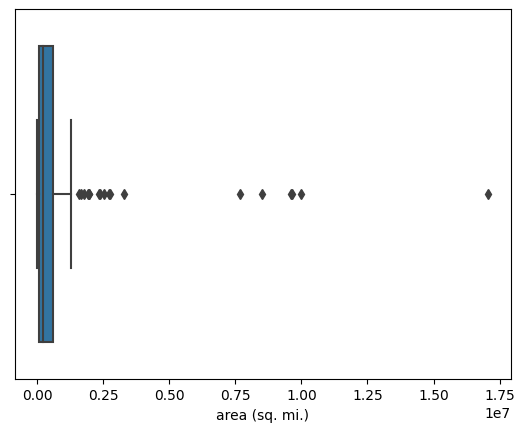

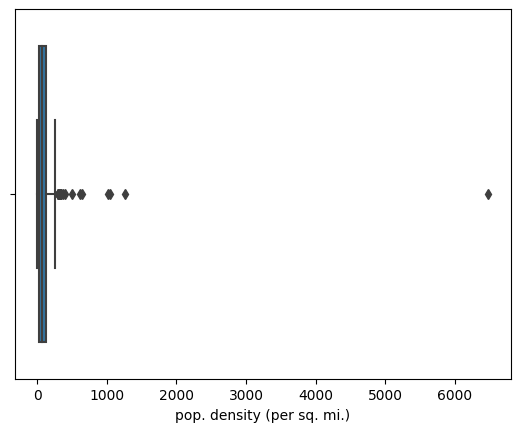

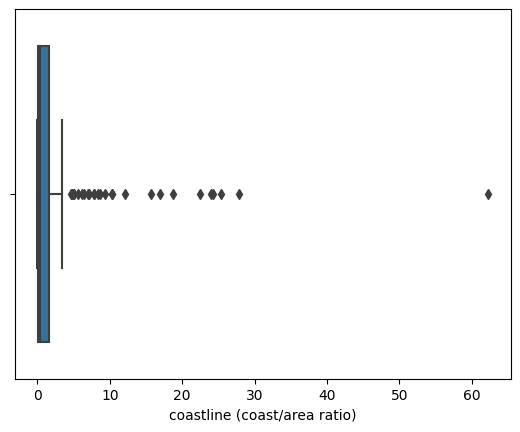

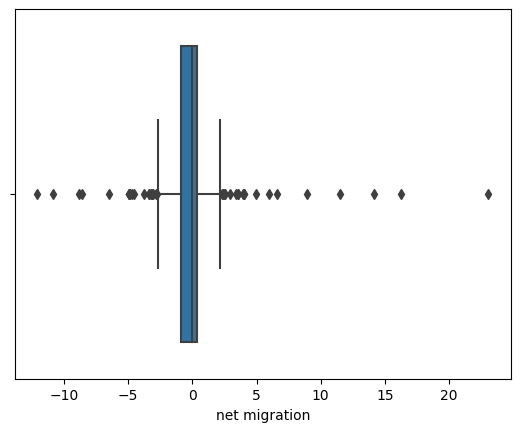

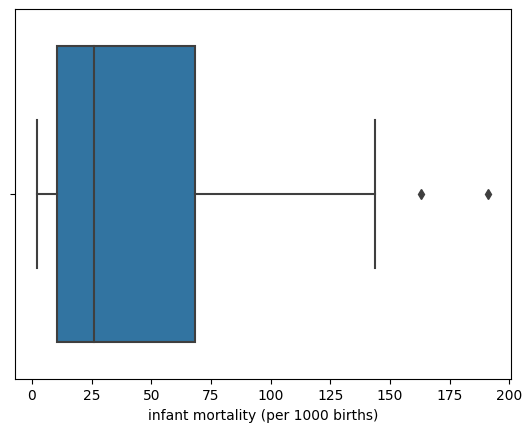

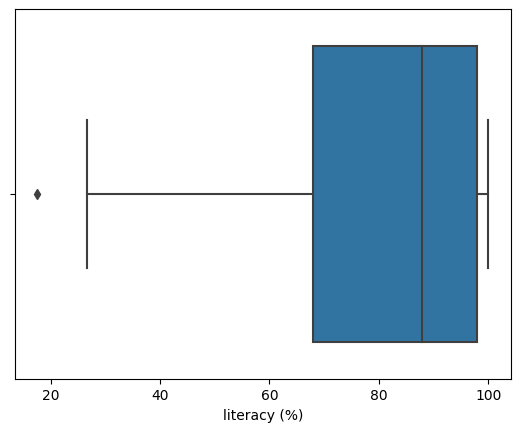

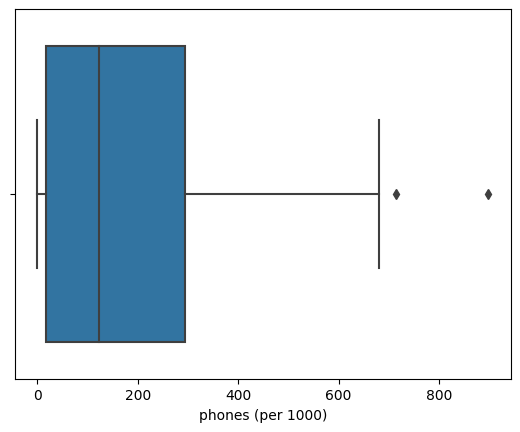

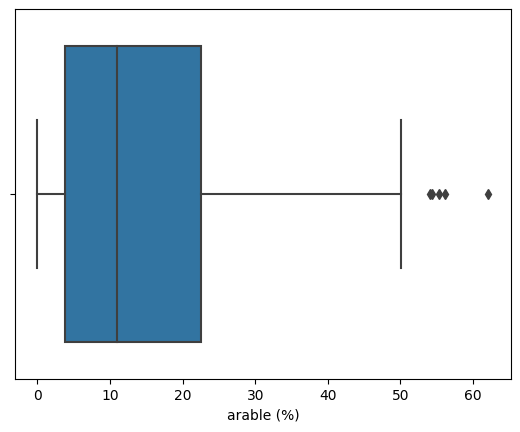

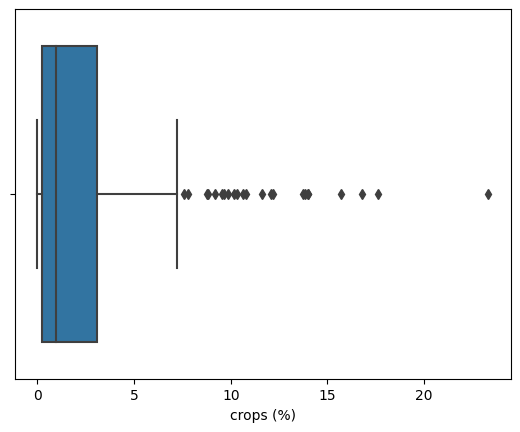

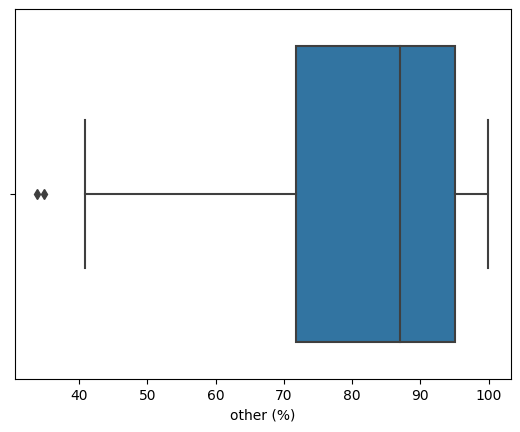

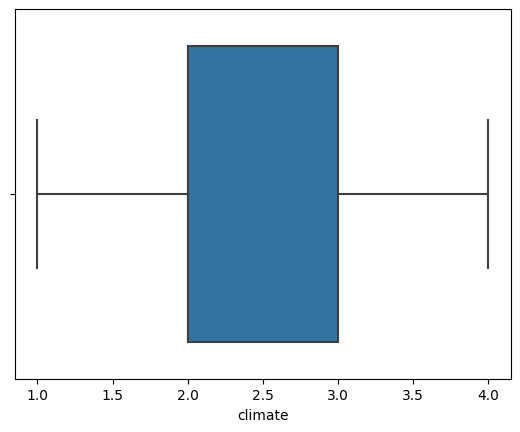

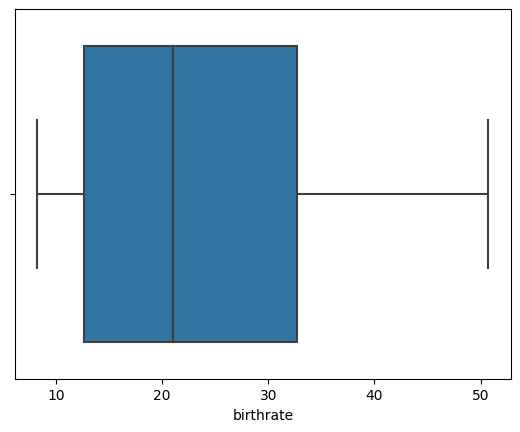

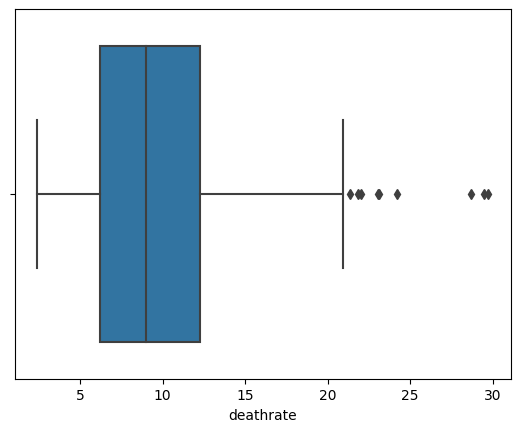

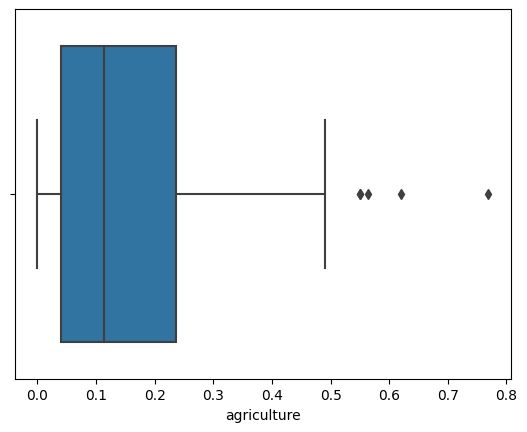

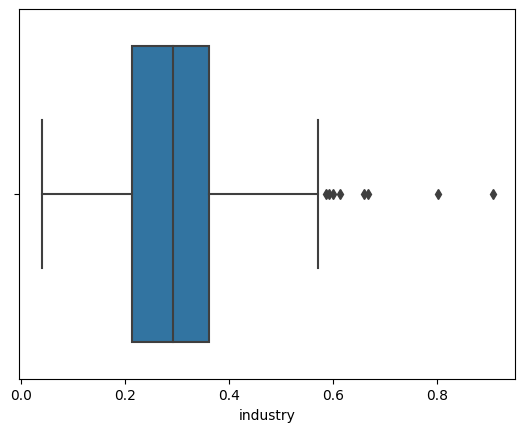

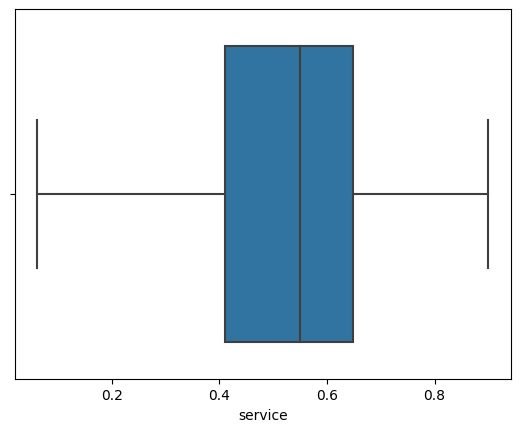

In [18]:
# Boxplots para identificar outliers
for column in merged_data.select_dtypes(include=['float64', 'int64']).columns:
    sns.boxplot(x=merged_data[column])
    plt.show()

#### Análisis de Categorías

In [19]:
# Análisis de columnas categóricas
for column in merged_data.select_dtypes(include=['object']).columns:
    print(merged_data[column].value_counts())

ireland            1
jamaica            1
cyprus             1
france             1
kazakhstan         1
                  ..
solomon islands    1
ghana              1
finland            1
senegal            1
united states      1
Name: country, Length: 166, dtype: int64
SUB-SAHARAN AFRICA                     45
LATIN AMER. & CARIB                    27
ASIA (EX. NEAR EAST)                   23
WESTERN EUROPE                         19
NEAR EAST                              14
C.W. OF IND. STATES                    12
EASTERN EUROPE                         11
OCEANIA                                 5
NORTHERN AFRICA                         5
BALTICS                                 3
NORTHERN AMERICA                        2
Name: region, dtype: int64


#### Matriz de correlación

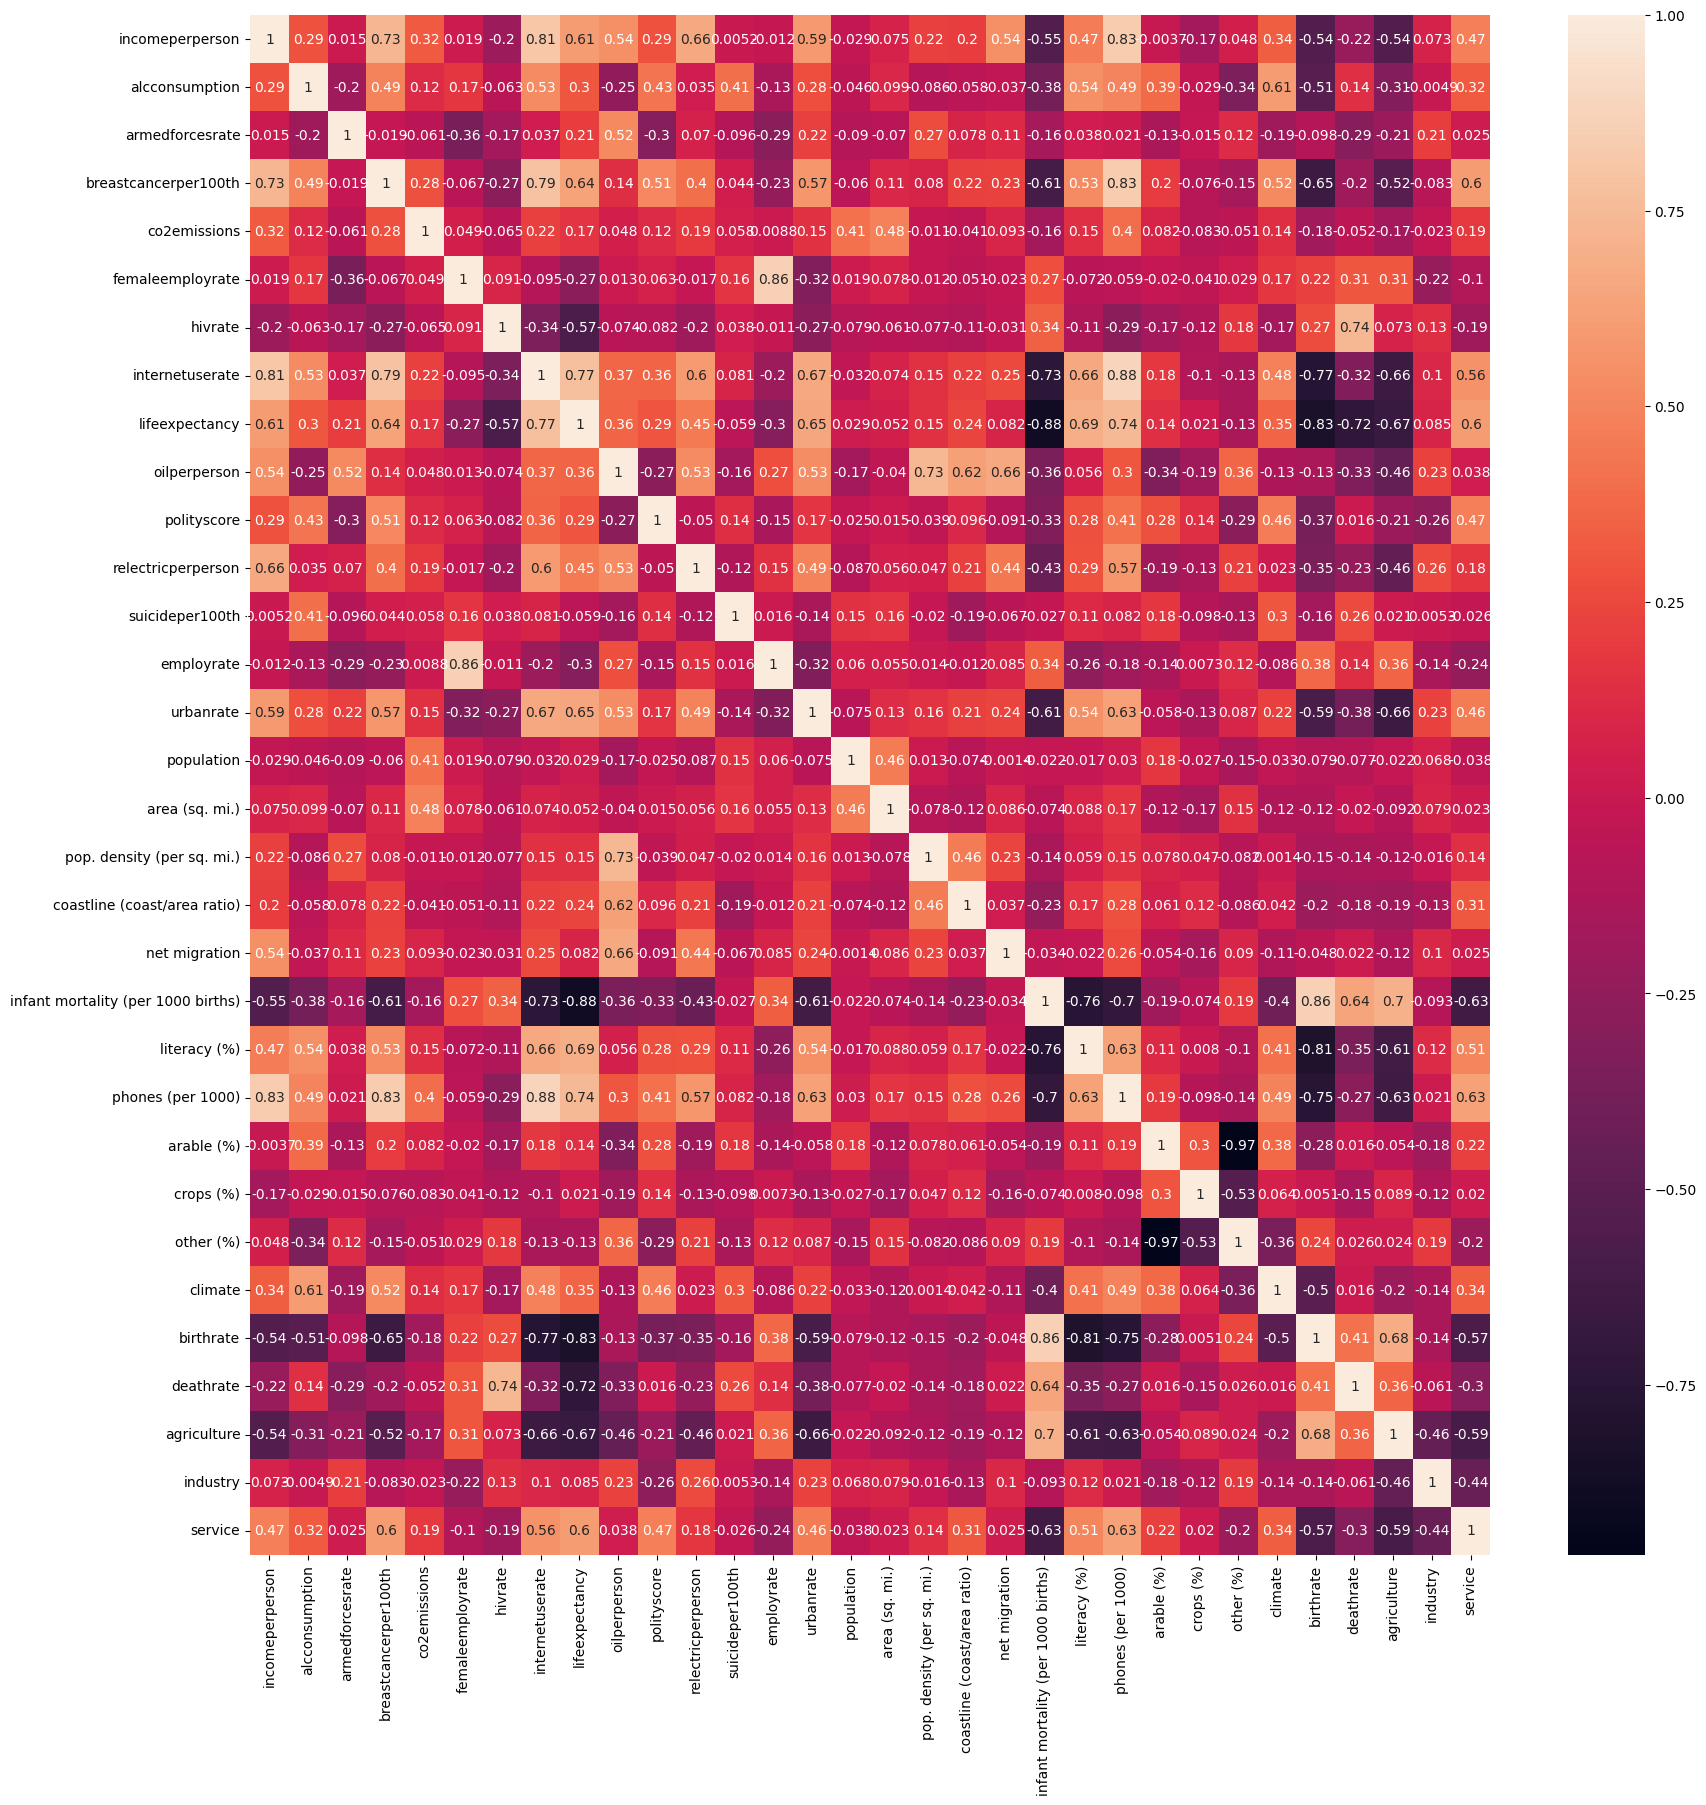

In [20]:
# Matriz de correlación para las columnas numéricas. Tamaño grande
correlation_matrix = merged_data.corr(numeric_only=True)
plt.subplots(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [21]:
merged_data.corr(numeric_only=True)

,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,...,phones (per 1000),arable (%),crops (%),other (%),climate,birthrate,deathrate,agriculture,industry,service
incomeperperson,1.000000,0.291129,0.015255,0.730466,0.316875,0.019218,-0.201640,0.808128,0.606281,0.542281,...,0.831998,-0.003705,-0.166135,0.047579,0.338850,-0.539616,-0.218342,-0.543165,0.072578,0.472093
alcconsumption,0.291129,1.000000,-0.196560,0.489040,0.117227,0.171937,-0.062769,0.527681,0.304747,-0.245880,...,0.493435,0.391966,-0.028908,-0.340230,0.606641,-0.513416,0.143597,-0.307362,-0.004907,0.316947
armedforcesrate,0.015255,-0.196560,1.000000,-0.018761,-0.061345,-0.360188,-0.168651,0.037379,0.207118,0.521558,...,0.020561,-0.131322,-0.015037,0.122005,-0.186278,-0.097658,-0.292841,-0.207353,0.205844,0.024706
breastcancerper100th,0.730466,0.489040,-0.018761,1.000000,0.284341,-0.067083,-0.273975,0.790571,0.638523,0.136904,...,0.831066,0.195100,-0.076041,-0.152924,0.519571,-0.645036,-0.197117,-0.516162,-0.083345,0.600906
co2emissions,0.316875,0.117227,-0.061345,0.284341,1.000000,0.049419,-0.064898,0.216852,0.167545,0.048104,...,0.397326,0.082223,-0.082904,-0.051105,0.136440,-0.178696,-0.051939,-0.166825,-0.022728,0.190823
femaleemployrate,0.019218,0.171937,-0.360188,-0.067083,0.049419,1.000000,0.090845,-0.095331,-0.270052,0.012525,...,-0.058801,-0.020091,-0.041030,0.028894,0.173416,0.215689,0.306850,0.307083,-0.223555,-0.104524
hivrate,-0.201640,-0.062769,-0.168651,-0.273975,-0.064898,0.090845,1.000000,-0.343845,-0.574164,-0.074064,...,-0.286631,-0.165792,-0.120374,0.180369,-0.172823,0.265291,0.737847,0.073287,0.132707,-0.185968
internetuserate,0.808128,0.527681,0.037379,0.790571,0.216852,-0.095331,-0.343845,1.000000,0.772903,0.368330,...,0.882413,0.179981,-0.103493,-0.132364,0.482893,-0.772059,-0.322263,-0.655080,0.102462,0.556528
lifeexpectancy,0.606281,0.304747,0.207118,0.638523,0.167545,-0.270052,-0.574164,0.772903,1.000000,0.358815,...,0.742086,0.141072,0.020615,-0.130759,0.354923,-0.825690,-0.720601,-0.674994,0.085367,0.602134
oilperperson,0.542281,-0.245880,0.521558,0.136904,0.048104,0.012525,-0.074064,0.368330,0.358815,1.000000,...,0.300774,-0.336514,-0.189510,0.363249,-0.128430,-0.131985,-0.331618,-0.458286,0.225083,0.038393


#### **Conclusiones del los análisis de las variables:**

**Valores Nulos:**
- oilperperson: Tiene 111 valores nulos, lo que indica que una gran cantidad de países en el dataset no tienen datos disponibles sobre el consumo de petróleo per cápita. Esto podría afectar el análisis.
- relectricperperson: Con 37 valores nulos, también presenta una cantidad considerable de datos faltantes.
- hivrate: Tiene 23 valores nulos. Más del 10% de los paises.
- climate: Cuenta con 17 valores nulos, menos del 10%. Aquí ya puede considerarse imputar datos.
- Otras variables como polityscore, internetuserate, armedforcesrate, incomeperperson, femaleemployrate, employrate, literacy (%), y phones (per 1000) tienen menos de 5 valores nulos cada una, lo cual es manejable.

**Estadísticas Descriptivas:**
- incomeperperson: La media es de 7202.019107 y la desviación estándar es bastante alta (10469.295971), lo que indica una gran variabilidad en los ingresos per cápita entre los diferentes países. El valor mínimo es 103.775857 y el máximo es 52301.587180, lo que muestra una amplia gama.
- lifeexpectancy: La esperanza de vida tiene una media de 69.41 años con una desviación estándar de 9.81 años, lo que indica una variabilidad moderada entre los países.
- breastcancerper100th: La media es de 37.62 con una desviación estándar de 23.23, lo que indica una variabilidad considerable.
- internetuserate: La media es de 34.74 con una desviación estándar de 28.09, nuevamente una alta variabilidad.
- urbanrate: La media es cercana a 56, lo que indica que más de la mitad de la población en los países del dataset vive en áreas urbanas.


**Correlaciones de los datos:**

- **incomeperperson:**
Correlación alta con internetuserate (0.808128) y phones (per 1000) (0.831998), lo que sugiere que podría tener una relación con otros indicadores de desarrollo y tecnología.

- **internetuserate:**
Correlación alta con lifeexpectancy (0.772185) y breastcancerper100th (0.786570), lo que sugiere que el acceso a internet puede estar relacionado con indicadores de salud y calidad de vida.

- **lifeexpectancy:**
Relacionado con varios indicadores como internetuserate y urbanrate (0.650418), lo que sugiere que la urbanización y el acceso a la tecnología pueden influir en la calidad de vida.

- **urbanrate:**
Correlación notable con incomeperperson (0.585350) y lifeexpectancy, lo que sugiere que la urbanización puede estar relacionada con el desarrollo económico y la calidad de vida.

- **breastcancerper100th:**
Tiene una correlación notable con incomeperperson y internetuserate, lo que sugiere que puede estar relacionado con el acceso a la salud y el bienestar general.

- **relectricperperson:**
Tiene correlaciones moderadas con incomeperperson (0.664379), lo que sugiere que el consumo de electricidad puede estar relacionado con el nivel económico del país.

*Nota: Se hace mención de variables que se llegan a considerar importantes para el modelo. Estas variables cubren una gama de indicadores económicos, tecnológicos, de salud y de urbanización que pueden ser cruciales para entender y modelar las diferencias entre países. Sin embargo, esto no basta para dejarlas como definitivas en la regresión lineal. La selección final de variables depende de análisis más profundos que haremos a continuación.*

## 2.3 Estategias de limpieza de datos

In [22]:
merged_data["region"].value_counts()

SUB-SAHARAN AFRICA                     45
LATIN AMER. & CARIB                    27
ASIA (EX. NEAR EAST)                   23
WESTERN EUROPE                         19
NEAR EAST                              14
C.W. OF IND. STATES                    12
EASTERN EUROPE                         11
OCEANIA                                 5
NORTHERN AFRICA                         5
BALTICS                                 3
NORTHERN AMERICA                        2
Name: region, dtype: int64

Como ya pudimos ver, el dataset contiene un número importante de valores nulos y de alguna manera tenemos que lidiar con ellos. Para ellos utilizaremos dos estrategias:
- Si el porcentaje de valores nulos es menor al 10%, se imputarán los valores utilizando la mediana (mediana de la región) de la columna si es numérica o la moda si es categórica.
- Si el porcentaje de valores nulos es mayor al 10%, se eliminará la columna.

Estas dicisiones se hicieron teniendo en cuenta que la información es mucho más diciente si se tiene en cuenta la región, pues los países de una misma región suelen tener características similares. Por otro lado, la mediana se utilizó en lugar de la media para evitar que los valores atípicos afecten el resultado.

In [23]:
# Función de imputar valores
def impute_values(df):
    for column in df.columns:
        # Solo se consideran las columnas con menos del 10% de valores nulos
        if df[column].isnull().sum() / df.shape[0] < 0.1:
            if df[column].dtype == 'object':  # Si la columna es categórica
                df[column] = df.groupby('region')[column].transform(lambda x: x.fillna(x.mode()[0]))
            else:  # Si la columna es numérica
                df[column] = df.groupby('region')[column].transform(lambda x: x.fillna(x.median()))
    return df


# Función de eliminar columnas
def drop_columns(df):
    for column in df.columns:
        # Si el porcentaje de valores nulos es mayor al 10%, se elimina la columna
        if df[column].isnull().sum() / df.shape[0] > 0.1:
            df.drop(column, axis=1, inplace=True)
    return df


merged_data = impute_values(merged_data) # Imputar valores
merged_data = drop_columns(merged_data) # Eliminar columnas

A continuación vamos a eliminar variables con alta correlación entre sí, pues esto puede afectar el modelo de regresión lineal. Para esto utilizaremos un umbral de 0.8, es decir, si dos variables tienen una correlación mayor a 0.8, se eliminará una de ellas. La variable a eliminar será la que tenga una menor correlación con la variable objetivo.

In [24]:
# Función para eliminar variables con alta correlación entre si. Conservamos una de las dos variables. El umbral es 0.8
# La variable objetivo no debe eliminarse. incomeperperson
def remove_highly_correlated(df, threshold=0.8, target='incomeperperson'):
    # Calcular la matriz de correlación excluyendo la columna objetivo
    correlation_matrix = df.drop(target, axis=1).corr(numeric_only = True).abs()
    
    # Obtener los pares de variables correlacionadas y la correlación con la variable objetivo
    correlated_pairs = {}
    cols_to_drop = set()
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if correlation_matrix.iloc[i, j] >= threshold:
                colname_i = correlation_matrix.columns[i]
                colname_j = correlation_matrix.columns[j]
                correlated_pairs[(colname_i, colname_j)] = correlation_matrix.iloc[i, j]
    
    # Determinar cuál variable del par tiene menor correlación con la variable objetivo y marcar para eliminación
    for pair, corr_value in correlated_pairs.items():
        corr_with_target_i = df[pair[0]].corr(df[target])
        corr_with_target_j = df[pair[1]].corr(df[target])
        if abs(corr_with_target_i) < abs(corr_with_target_j):
            cols_to_drop.add(pair[0])
        else:
            cols_to_drop.add(pair[1])
    
    # Eliminar las columnas marcadas
    df_cleaned = df.drop(cols_to_drop, axis=1)
    
    return df_cleaned
    

new_data = remove_highly_correlated(merged_data)

print("Columnas eliminadas: ", set(merged_data.columns) - set(new_data.columns))

merged_data = new_data

Columnas eliminadas:  {'internetuserate', 'infant mortality (per 1000 births)', 'birthrate', 'employrate', 'breastcancerper100th', 'arable (%)', 'literacy (%)'}


Adicionalmente es muy importante investigar entre la correlación de las variables independientes y la variable objetivo. 

En la regresión lineal, es deseable que las variables independientes tengan una correlación significativa con la variable objetivo, ya que esto indica que hay una relación lineal que el modelo puede aprender.

Un umbral común que se utiliza para determinar si una correlación es significativa es 0.1 en adelante (en valor absoluto). En este caso utilizaremos un valor de 0.1 y observaremos los datos resultantes y sus correlaciones.

In [25]:
def remove_low_correlation(df, threshold=0.1, target='incomeperperson'):
    # Calcular la correlación de cada variable con la variable objetivo
    correlations_with_target = df.corr(numeric_only = True)[target].abs()
    
    # Encontrar las columnas con correlación por debajo del umbral
    cols_to_drop = correlations_with_target[correlations_with_target < threshold].index
    
    # Eliminar estas columnas del DataFrame
    df_cleaned = df.drop(cols_to_drop, axis=1)
    
    return df_cleaned

new_data = remove_low_correlation(merged_data, threshold=0.1)

print("Columnas eliminadas: ", set(merged_data.columns) - set(new_data.columns))

merged_data = new_data

print("Correlaciones resultantes: ", merged_data.corr(numeric_only=True)["incomeperperson"].abs().sort_values(ascending=False))

Columnas eliminadas:  {'femaleemployrate', 'population', 'suicideper100th', 'other (%)', 'industry', 'area (sq. mi.)', 'armedforcesrate'}
Correlaciones resultantes:  incomeperperson                 1.000000
phones (per 1000)               0.831856
lifeexpectancy                  0.605508
urbanrate                       0.583344
agriculture                     0.540353
service                         0.474999
net migration                   0.427598
climate                         0.348026
co2emissions                    0.317194
polityscore                     0.302465
alcconsumption                  0.293105
deathrate                       0.222332
pop. density (per sq. mi.)      0.216737
coastline (coast/area ratio)    0.206211
crops (%)                       0.162366
Name: incomeperperson, dtype: float64


Ahora bien, la presencia de valores atípicos puede afectar gravemente a nuestro modelo. Al ser una regresión lineal, la pendiente de la recta de regresión puede verse influenciada, por lo que es importante identificarlos y decidir qué hacer con ellos. Para esto se utilizaron los boxplots de cada variable (podemos verlos con claridad en la sección de entendimiento de los datos), los cuales nos permiten identificar los valores atípicos de manera visual.

No hay una estrategía definitiva pero si hay umbrales comunmente utilizados para identificar valores atípicos. Una estategía podría ser el IQR pero esto eliminaría un porcentaje muy importante de nuestros datos. Así que lo que consideramos eliminar aquellos valores que excedan el percentil 99 de la distribución (los outliers siempre se dan en la parte superior de la distribución). 

Adicionalmente con la variable objetivo eliminaremos los valores que excedan el percentil 99 de la distribución (Para evitar valores muy altos de GDP como luxemburgo).

In [26]:
# Función de eliminar valores atipicos eliminanos valores que excedan el percentil 95
def remove_outliers(df):
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        # Se calcula el percentil 95
        percentile_99 = np.percentile(df[column], 99.35)
        # Se eliminan los valores que excedan el percentil 95
        df = df[df[column] <= percentile_99]

    return df
            

print("Tamaño antes de eliminar outliers: ", merged_data.shape)
new_data = remove_outliers(merged_data) # Eliminar outliers
print("Tamaño después de eliminar outliers: ", new_data.shape)
# Paises eliminados
print("Paises eliminados: ", set(merged_data.country) - set(new_data.country))

merged_data = new_data

Tamaño antes de eliminar outliers:  (166, 17)
Tamaño después de eliminar outliers:  (147, 17)
Paises eliminados:  {'luxembourg', 'china', 'united states', 'bahrain', 'bahamas', 'sweden', 'south korea', 'comoros', 'japan', 'singapore', 'moldova', 'switzerland', 'norway', 'malta', 'barbados', 'kuwait', 'liberia', 'afghanistan', 'swaziland'}


Los valores de ciertos paises en rubros especificos son particularmente altos, y en un modelo de regresión lineal no nos podemos permitir injectar este tipo de ruido que termina afectando el comportamiento de la recta de regresión.

# 3. Entrenamiento de modelo de regresión

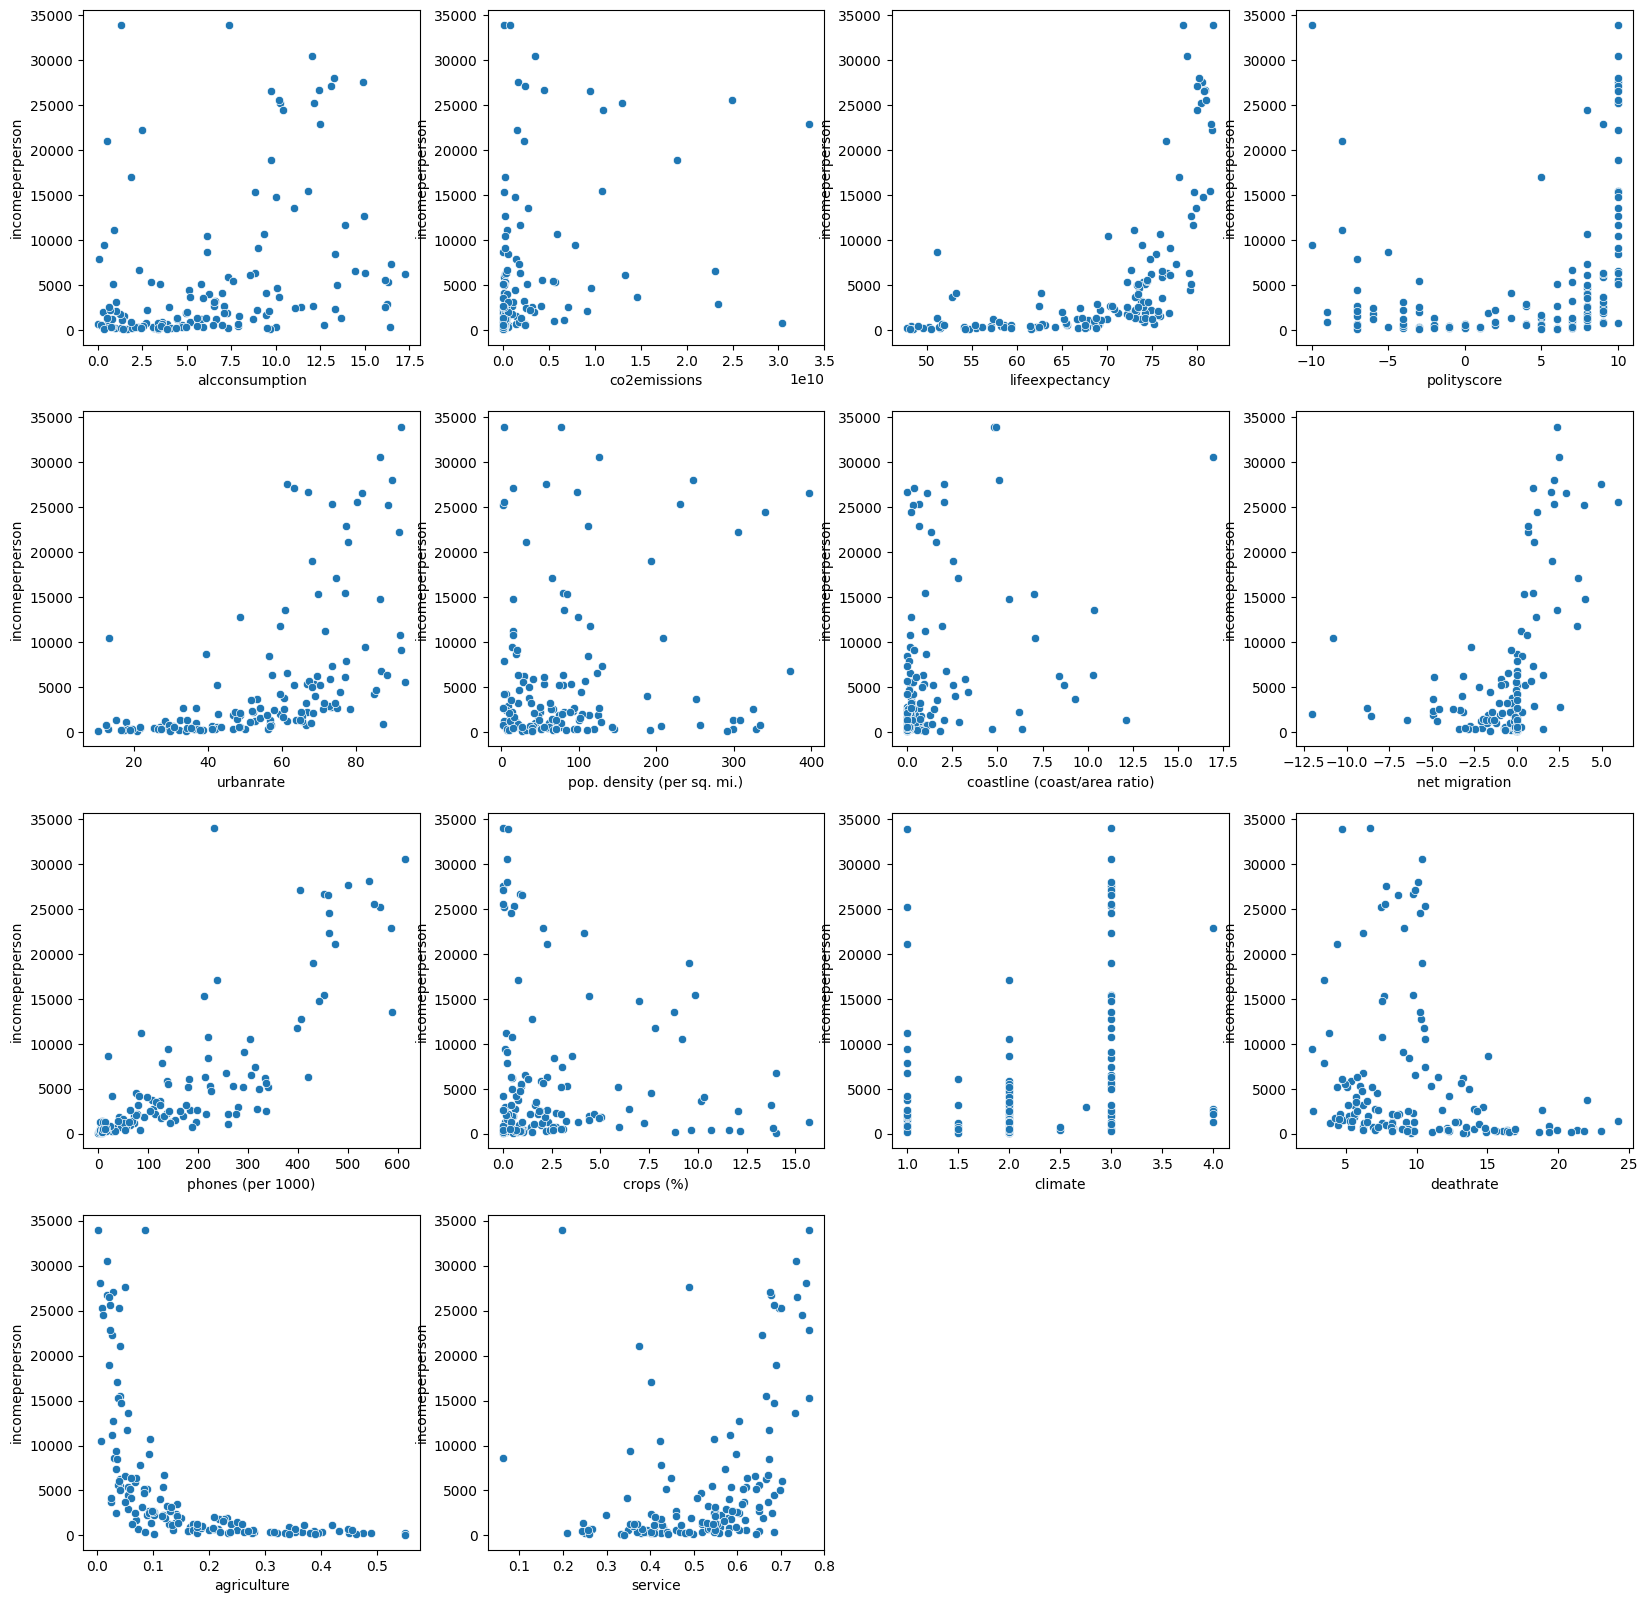

In [27]:
# Realizar un pairplot entre todas las variables independientes y la variable objetivo. Serán 4 columnas y tantas filas como sean necesarias.
def create_pairplot(df, target_column, independent_columns):
    
    # Numero de columnas
    n_cols = 4
    # Número de filas 
    n_rows = len(independent_columns) // n_cols + 1

    # Tamaño de la figura
    plt.figure(figsize=(20, 20))

    # Realizar pairplot de variable objetivo vs cada variable independiente
    for i, column in enumerate(independent_columns):
        plt.subplot(n_rows, n_cols, i + 1)
        sns.scatterplot(x=df[df[column] <= np.percentile(df[column], 99)][column], y=df[target_column]) # Los visualizamon sin los outliers restantes para ver mejor la relación

    plt.show()

create_pairplot(merged_data, "incomeperperson", merged_data.drop(["country", "region", "incomeperperson"], axis=1).columns)

El objetivo de la visualización PairPlot es escoger aquellas variables que tengan una relación lineal con la variable objetiva. Si vemos algún otro tipo de comportamiento, la teoria nos indica que no es recomendable utilizar dicha variable. Particularmente ne la visualización vemos que las siguientes variables siguen un comportamiento lineal con la variable objetivo:
- Alcconsumption
- Life expectancy
- Urban rate
- Net migration
- PPhones (per 1000)
- Agriculture (Aunque más que lineal parece una relación logaritmica inversa, hay que tener cuidado con esta variable)
- Service

In [28]:
# Nos quedamos con las variables de interés
merged_data = merged_data[["alcconsumption", "lifeexpectancy", "urbanrate", "net migration", "phones (per 1000)", "agriculture", "service", "incomeperperson"]]
merged_data.head()

,alcconsumption,lifeexpectancy,urbanrate,net migration,phones (per 1000),agriculture,service,incomeperperson
0,14.92,80.557,61.34,4.99,500.5,0.050,0.490,27595.091350
2,7.29,76.918,46.72,-4.93,71.2,0.232,0.579,1914.996551
3,3.17,48.398,38.58,0.00,2.3,0.550,0.250,239.518749
5,9.72,81.855,68.08,2.07,430.9,0.021,0.688,18982.269290
8,0.11,58.582,41.00,0.00,12.9,0.250,0.460,609.131206


Ahora a partir de la función smf.ols() ajustaremos un modelo de regresión de mínimos cuadrados ordinarios (OLS) utilizando la biblioteca statsmodels. La regresión MCO es un método estadístico para estimar las relaciones entre un conjunto de variables independientes (predictores) y una variable dependiente (resultado).

In [29]:
formula = 'Q("incomeperperson") ~ alcconsumption + lifeexpectancy + urbanrate + Q("net migration") + Q("phones (per 1000)") + agriculture + service'

# Ajustar el modelo de regresión
model = smf.ols(formula, data=merged_data).fit()

# Mostrar un resumen de los resultados del modelo
model_summary = model.summary()
print(model_summary)

                             OLS Regression Results                             
Dep. Variable:     Q("incomeperperson")   R-squared:                       0.789
Model:                              OLS   Adj. R-squared:                  0.779
Method:                   Least Squares   F-statistic:                     74.42
Date:                  Sun, 08 Oct 2023   Prob (F-statistic):           6.94e-44
Time:                          22:17:59   Log-Likelihood:                -1417.5
No. Observations:                   147   AIC:                             2851.
Df Residuals:                       139   BIC:                             2875.
Df Model:                             7                                         
Covariance Type:              nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercep

- El valor de R² es 0.789, lo que sugiere que el modelo es capaz de explicar el 78.9% de la variabilidad en el PIB per cápita. Esto indica un ajuste muy fuerte del modelo a los datos.

- El valor de R² ajustado es 0.779, que también es muy alto y ajusta el R² basado en el número de predictores en el modelo. Esto también indica un ajuste fuerte.

- alcconsumption, net migration y phones (per 1000) tienen p-valores significativos (menores a 0.05), lo que indica que son predictores significativos del ingreso por persona.

- lifeexpectancy, urbanrate, agriculture, y service tienen p-valores más altos (mayores a 0.05), lo que sugiere que no son predictores significativos del ingreso por persona en este modelo.

In [30]:
final_cols = ["alcconsumption", "net migration", "phones (per 1000)", "incomeperperson"]

merged_data = merged_data[final_cols]

# Separar las variables independientes de la variable objetivo
X = merged_data.drop("incomeperperson", axis=1)
y = merged_data["incomeperperson"]

# Separar los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Finalmente con las variables escogidas pasamos al entrenamiento del modelo de regresión lineal. Para esto utilizaremos la función LinearRegression() de la librería sklearn. Haremos dos regresiones lineales con dos diferencias claves sobre los datos:
- Regresión lineal con los datos originales
- Regresión lineal con los datos escalados

Creración del modelo de regresión lineal con los datos originales:

In [31]:
# Crear el modelo de regresión lineal y entrenándolo con los datos originales
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

Evaluar el modelo de regresión lineal con los datos originales:

In [32]:
# Creando el modelo de regresión lineal y entrenándolo con los datos originales
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [33]:
# Evaluar el modelo con datos originales
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# imprimir métricas de desempeño para datos originales
print(f'RMSE with original data: {rmse}')
print(f'R-squared with original data: {r2}')

RMSE with original data: 4176.994057515223
R-squared with original data: 0.7635254539609062


Creación del modelo de regresión lineal con los datos escalados:

In [34]:
# Escalando los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [35]:
# Crear el modelo de regresión lineal y entrenándolo con los datos escalados
lr_scaled = LinearRegression()
lr_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [36]:
# Evaluar el modelo con datos escalados
mse_scaled = mean_squared_error(y_test, y_pred_scaled)
# RMSE
rmse_scaled = np.sqrt(mse_scaled)
r2_scaled = r2_score(y_test, y_pred_scaled)

# Imprimir métricas de desempeño para datos escalados
print(f'RMSE with scaled data: {rmse_scaled}')
print(f'R-squared with scaled data: {r2_scaled}')

RMSE with scaled data: 4176.9940575152295
R-squared with scaled data: 0.7635254539609054


Como pudimos observar no hubo mayor diferencia entre lso resultados con los datos escalados y originales. De hecho es una diferencia despreciable. Por lo que para facilitar interpretabilidad escogeremos el modelo con los datos originales.

Visualización de los coeficientes del modelo

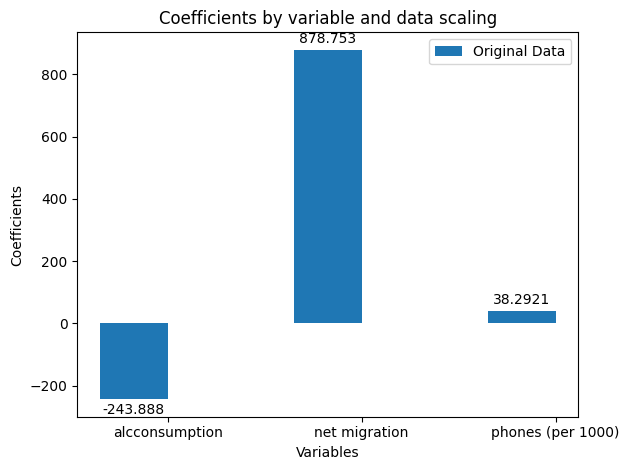

In [37]:
labels = final_cols[:-1]  # Excluyendo 'incomeperperson'
x = np.arange(len(labels))  # Localización de las etiquetas

width = 0.35  # Ancho de las barras

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, lr.coef_, width, label='Original Data')

# Texto, título y etiquetas personalizadas
ax.set_xlabel('Variables')
ax.set_ylabel('Coefficients')
ax.set_title('Coefficients by variable and data scaling')
# Escribir el valor
ax.bar_label(rects1, padding=3)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.show()

Analisis de error en predicciones

In [38]:
(y_test - y_pred).describe(percentiles=[.25, .5, .75, .95, .99]) 

count      30.000000
mean      920.254338
std      4144.012462
min     -8339.161663
25%      -758.542372
50%       668.742708
75%      3328.959093
95%      7182.680100
99%      8029.385037
max      8199.539199
Name: incomeperperson, dtype: float64

In [39]:
# Peores casos
worst_condition = np.where(np.abs(y_test - y_pred) > 7000, True, False)

worst_cases = pd.concat([X_test.loc[worst_condition],
    y_test.loc[worst_condition]
], axis=1).reset_index(drop=True)

# Concatenar valor real
worst_cases = pd.concat([worst_cases, pd.Series(y_pred[worst_condition], name="predicted incomeperperson")], axis=1)

# Mejores casos
best_condition = np.where(np.abs(y_test - y_pred) < 1000, True, False)

best_cases = pd.concat([X_test.loc[best_condition],
    y_test.loc[best_condition]
], axis=1).reset_index(drop=True)

# Concatenar valor real
best_cases = pd.concat([best_cases, pd.Series(y_pred[best_condition], name="predicted incomeperperson")], axis=1)

In [40]:
worst_cases


,alcconsumption,net migration,phones (per 1000),incomeperperson,predicted incomeperperson
0,0.65,6.59,104.5,2534.000380,10873.162043
1,5.81,0.51,340.7,5188.900935,13316.478140
2,7.38,2.38,647.7,33945.314420,26332.513711
3,6.12,0.00,18.5,8654.536845,454.997646


In [41]:
# Observar los mejores casos
best_cases

,alcconsumption,net migration,phones (per 1000),incomeperperson,predicted incomeperperson
0,4.71,0.00,2.6,557.947513,190.034906
1,3.90,-1.57,7.4,161.317137,-808.255671
2,0.34,-0.67,1.9,180.083376,640.254965
3,3.17,0.00,2.3,239.518749,554.134162
4,4.10,0.00,8.2,220.891248,553.242040
5,4.72,-2.45,84.0,372.728414,1151.628359
6,5.78,-1.32,71.9,1232.794137,1422.763642
7,2.56,-0.02,16.3,523.950151,1221.419804
8,3.64,0.00,10.9,744.239413,768.818974


Finalmente mostraremos los coeficientes de nuestro modelo

In [42]:
# Mostrar coeficientes junto con los nombres de las variables
pd.DataFrame({"Variable": X_train.columns, "Coeficiente": lr.coef_})

,Variable,Coeficiente
0,alcconsumption,-243.887587
1,net migration,878.752583
2,phones (per 1000),38.292090


# 4. Validación de suspuestos

La construcción de un buen modelo de Machine Learning va más allá de solamente minimizar las métricas de error. El modelo de regresión lineal, desde una perspectiva clásica, debería además cumplir con los siguientes supuestos:

- 1. Colinealidad: Las variables independientes no deben estar correlacionadas entre sí.
- 2. Linealidad: La relación entre las variables independientes y la variable dependiente debe ser lineal.
- 3. Normalidad de los errores: Los errores deben estar normalmente distribuidos.
- 4. Varianza constante (Homocedasticidad): Los errores deben tener varianza constante.

Matriz de colinealidad:                     alcconsumption  net migration  phones (per 1000)
alcconsumption           1.000000       0.104616           0.580249
net migration            0.104616       1.000000           0.334985
phones (per 1000)        0.580249       0.334985           1.000000


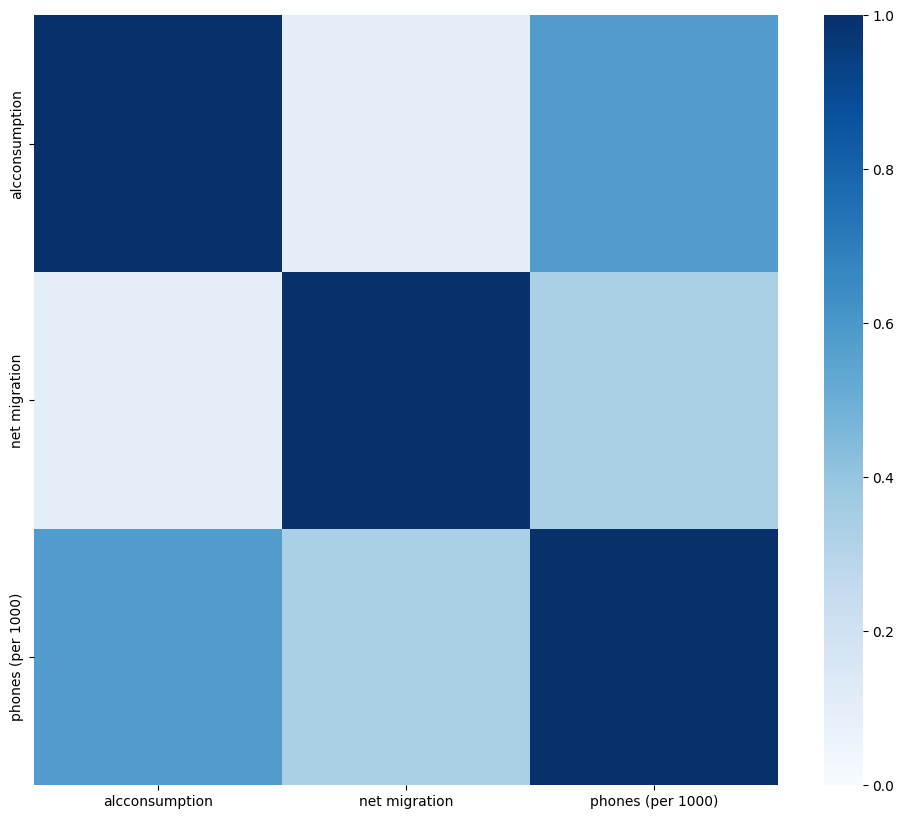

In [43]:
# 1. Colinealidad:
# Calculando el Factor de Inflación de la Varianza (VIF) para cada variable en X.
plt.figure(figsize=(12, 10))
sns.heatmap(X_train.corr(), cmap="Blues", vmin=0, vmax=1)

print("Matriz de colinealidad: ", X_train.corr())

La colinealidad se cumple, no sobrepasamos el umbral de 0.8 en la matriz de correlación.

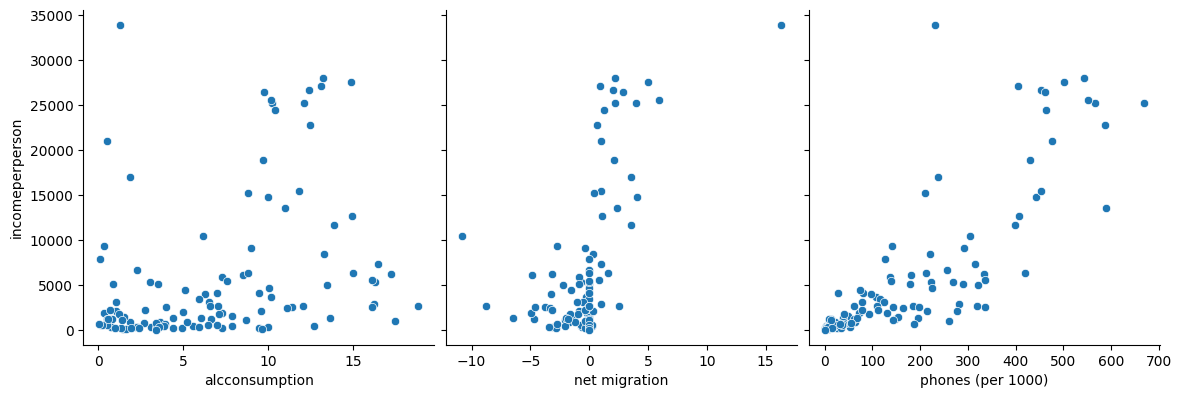

In [44]:
# 2. Linealidad:
# Verificando la linealidad mediante gráficos de dispersión residuales.
sns.pairplot(pd.concat([X_train, y_train], axis=1), height=4, y_vars="incomeperperson", x_vars=X_train.columns, kind="scatter")

Podemos observar un comportamiento lineal entre las variables escogidas y la variable objetivo

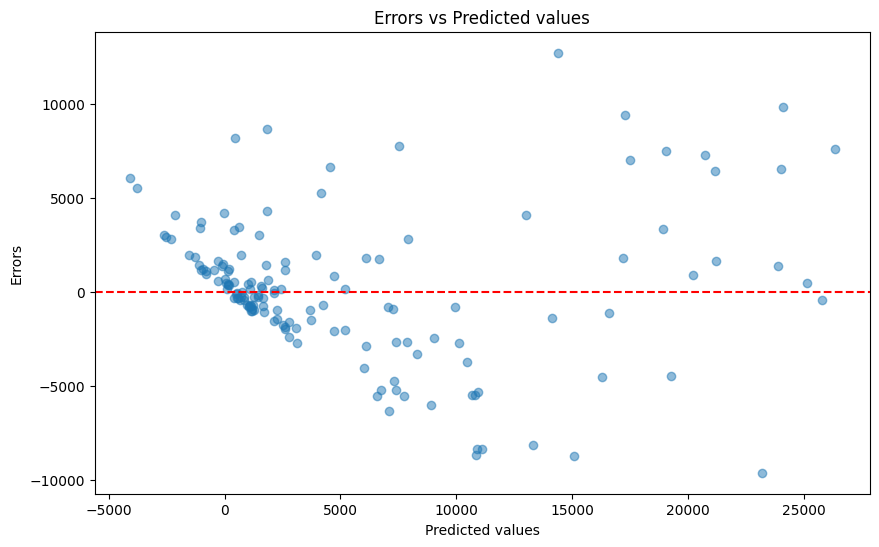

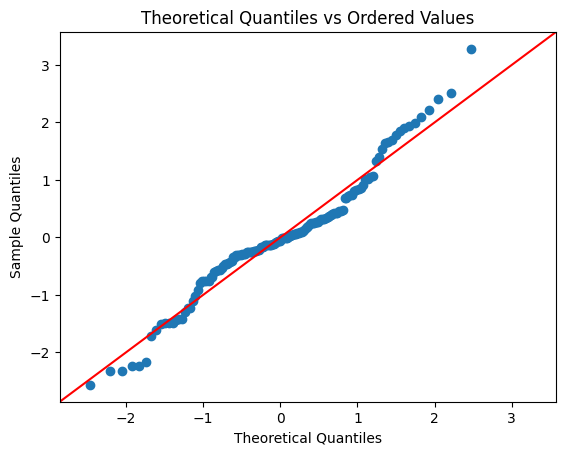

In [45]:
# 3. Normalidad de los errores:

# Dos gráficos. 
# 1. Errors vs Predicted values en scatter plot 
# 2. Teoretical Quantiles vs Ordered values

# Predicciones del modelo
y_pred = lr.predict(X)

# Calculando los errores
errors = y - y_pred

# 1. Gráfico de errores vs valores predichos
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, errors, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Errors vs Predicted values')
plt.xlabel('Predicted values')
plt.ylabel('Errors')
plt.show()

# 2. Gráfico de Quantiles Teóricos vs Valores Ordenados (Q-Q Plot)
sm.qqplot(errors, line ='45', fit=True)
plt.title('Theoretical Quantiles vs Ordered Values')
plt.show()

Tenemos una correcta normalidad de los errores. Sin embago hay una ligera disperción entre valores predichos y valores reales que de cierta forma es acorde con la distribución de los datos.

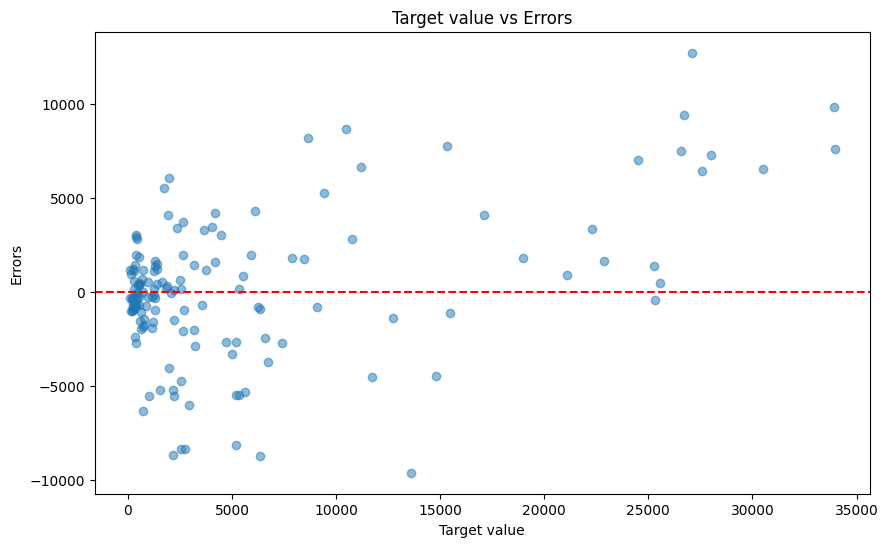

In [46]:
# 4. Varianza constante (Homocedasticidad):

# Gráfico target value vs errors

plt.figure(figsize=(10, 6))
plt.scatter(y, errors, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Target value vs Errors')
plt.xlabel('Target value')
plt.ylabel('Errors')
plt.show()

Aunque no es definitiva (Por errores particularmente altos en algunos paises) la la homocedasticidad está presente en la gran mayoría de los casos.

# 5. Conclusiones

1. Diversidad de Variables:

    -   La combinación de datasets permitió evaluar una diversidad de factores socioeconómicos y ambientales (como la tasa de empleo, la tasa de suicidios, las emisiones de CO2, entre otros) en relación con el PIB per cápita.
    -   Se pudo explorar la relación entre variables de diferentes dominios, como el empleo, el consumo de alcohol, la tasa de migración neta y el acceso a tecnología, proporcionando una vista holística de los factores que podrían influir en la economía de un país.


2.  Relación entre las Variables y el PIB:

    -   Consumo de Alcohol (`alcconsumption`): El coeficiente negativo de -309.42 sugiere que un aumento en el consumo de alcohol está asociado con una disminución en el PIB per cápita. Esto podría estar relacionado con los costos de salud pública y la pérdida de productividad asociados con el abuso del alcohol.
    -   Migración Neta (`net migration`): El coeficiente positivo de 775.73 indica que un saldo migratorio positivo (más personas entrando al país que saliendo) está asociado con un aumento en el PIB per cápita. Esto podría reflejar una economía atractiva y en crecimiento que atrae a más individuos.
    -   Teléfonos por 1000 habitantes (`phones (per 1000)`): Un coeficiente de 41.35 sugiere que una mayor disponibilidad de tecnología de comunicación está correlacionada positivamente con un mayor PIB per cápita, posiblemente reflejando una mayor infraestructura y desarrollo tecnológico.


3.  Métricas de Error:

    -   El Error Cuadrático Medio (RMSE) con los datos originales es de 4176.99.
    -   El R-cuadrado con los datos originales es de 0.7635, lo que sugiere que el modelo explica aproximadamente el 76.35% de la variabilidad en el PIB per cápita.
    

4.  Validación de Supuestos:

    -   Se observó colinealidad moderada entre el consumo de alcohol y los teléfonos por 1000 habitantes. También, se encontraron problemas de homocedasticidad y normalización de errores en un bajo número de casos, lo que indica que el modelo podría ser menos preciso en los extremos de la distribución.


Recomendaciones de Políticas Públicas:

Dado que un alto PIB per cápita puede representar un buen comportamiento de pago de un país, y basándonos en las relaciones identificadas entre el PIB per cápita y otras variables, recomendamos las siguientes políticas públicas:

1.  Reducción del Consumo de Alcohol: Implementar políticas de salud pública para reducir el consumo de alcohol, lo que podría mejorar la productividad y reducir los costos de salud.
2.  Fomentar la Migración Positiva: Establecer políticas que atraigan a individuos calificados y emprendedores para contribuir al crecimiento económico.
3.  Desarrollo Tecnológico e Infraestructura de Comunicaciones: Invertir en tecnología e infraestructura de comunicaciones para promover la inclusión digital y apoyar el crecimiento económico.